### week 7

### 2 feb 2026:

### What is Feature Scalling?

Feature scalling is a technique to standardize the independent features present in the data in a fix range

- why: 

je apala independent variable ahe tyancha scale jar same nasel tar machine learning che algorithm cha used kela jato.

- Types of Feature scalling

1. Standardlization  
2. Normalization

.

#### 1. Standardization:

-Also calles as z-score normalization  
-standardization rescales numerical features so that:

Mean = 0  
Standard Deviation = 1 

Example:

📐 Formula  
X_scaled = (X − Mean) / Std Dev

Example:

Marks = 70  
Mean = 60  
Std = 10

(70−60)/10 = 1

#### 2. Normalization:

-Rescale the feature in fixed range between 0 to 1  
-Also called as Min-Max scalling.

📐 Normalization Formula (Min–Max Scaling):

X_normalized = (X − Xmin) / (Xmax − Xmin)


Where:

X = current value  
Xmin = minimum value  
Xmax = maximum value

Example:

Age values range from 20 to 60  
Current age = 40

(40 − 20) / (60 − 20) = 0.5

So, normalized value = 0.5

### Difference between Standardization and Normalization

| **Standardization**                                     | **Normalization**                                   |
| ------------------------------------------------------- | --------------------------------------------------- |
| Scales data based on **mean and standard deviation**    | Scales data based on **minimum and maximum values** |
| Mean becomes **0** and standard deviation becomes **1** | Values are scaled to a **fixed range (0 to 1)**     |
| **Less affected by outliers**                           | **Highly affected by outliers**                     |
| Preserves the **shape of data distribution**            | **Compresses** the data distribution                |
| Used in **Linear/Logistic Regression, SVM, PCA**        | Used in **KNN, Neural Networks, image data**        |


In [45]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [46]:
df= sns .load_dataset('titanic')
df.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
df2 = df[['survived','pclass','age','parch']]
df2.head() 

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [48]:
df3= df2.fillna(df2.mean()) # handling missing values

x= df3.drop("survived", axis=1)
y=df3["survived"]
print('shape of x = ', x.shape)
print('shape of y =', y.shape)

shape of x =  (891, 3)
shape of y = (891,)


#### Train and test

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)  
print('shape of x_train = ', x_train.shape)
print('shape of x_test = ', x_test.shape)
print('shape of y_train = ', y_train.shape)
print('shape of y_test = ', y_test.shape)

shape of x_train =  (712, 3)
shape of x_test =  (179, 3)
shape of y_train =  (712,)
shape of y_test =  (179,)


##### Standard scaler

In [50]:
sc = StandardScaler() 
sc.fit(x_train) # fit only on training data

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [51]:
## check the mean and variance used in scaling
sc.mean_  # mean of training data

array([ 2.33005618, 29.53822538,  0.37921348])

In [52]:
## check the variance used in scaling
sc.scale_  # standard deviation of training data

array([ 0.82400502, 12.98541943,  0.79111317])

In [53]:
## check the data before scaling
x_train.describe()  # before scaling

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.330056,29.538225,0.379213
std,0.824584,12.994548,0.791669
min,1.000000,0.420000,0.000000
25%,2.000000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,80.000000,6.000000


In [54]:
x_train_sc = sc.transform(x_train)  # transform training data
x_test_sc = sc.transform(x_test)    # transform test data using the same parameters

In [55]:
x_train_sc

array([[-1.61413602,  1.22920747, -0.47934164],
       [-0.40055118, -0.50350514, -0.47934164],
       [ 0.81303367,  0.18957991, -0.47934164],
       ...,
       [ 0.81303367,  0.88266495, -0.47934164],
       [-1.61413602, -1.19659018,  2.04874166],
       [-1.61413602, -0.65752403,  0.78470001]], shape=(712, 3))

In [56]:
x_train_sc = pd.DataFrame(x_train_sc, columns = ["pclass", 'age','parch'])
x_test_sc = pd.DataFrame(x_test_sc, columns = ["pclass", 'age', 'parch'])

In [57]:
x_train_sc . head()

,pclass,age,parch
0,-1.614136,1.229207,-0.479342
1,-0.400551,-0.503505,-0.479342
2,0.813034,0.189580,-0.479342
3,0.813034,-0.272477,-0.479342
4,0.813034,-1.812666,2.048742


In [58]:
x_train_sc.describe().round(2) # after scaling, mean ~0 , std ~1

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.61,-2.24,-0.48
25%,-0.40,-0.58,-0.48
50%,0.81,0.01,-0.48
75%,0.81,0.42,-0.48
max,0.81,3.89,7.10


In [59]:
mmc = MinMaxScaler()
mmc.fit(x_train)  # fit only on training data

,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False


In [60]:
x_train_mmc = mmc.transform(x_train)  # scale the training data
x_test_mmc = mmc.transform(x_test)    # scale the test data using the same parameters

In [61]:
x_train_mmc

array([[0.        , 0.56647399, 0.        ],
       [0.5       , 0.28373963, 0.        ],
       [1.        , 0.39683338, 0.        ],
       ...,
       [1.        , 0.50992712, 0.        ],
       [0.        , 0.17064589, 0.33333333],
       [0.        , 0.25860769, 0.16666667]], shape=(712, 3))

In [62]:
x_train_mmc = pd.DataFrame(x_train_mmc, columns = ["pclass", 'age','parch'])
x_test_mmc = pd.DataFrame(x_test_mmc, columns = ["pclass", 'age', 'parch'])

In [63]:
x_train_mmc.describe().round(2)  # after min-max scaling, min=0 , max=1

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.67,0.37,0.06
std,0.41,0.16,0.13
min,0.00,0.00,0.00
25%,0.50,0.27,0.00
50%,1.00,0.37,0.00
75%,1.00,0.43,0.00
max,1.00,1.00,1.00


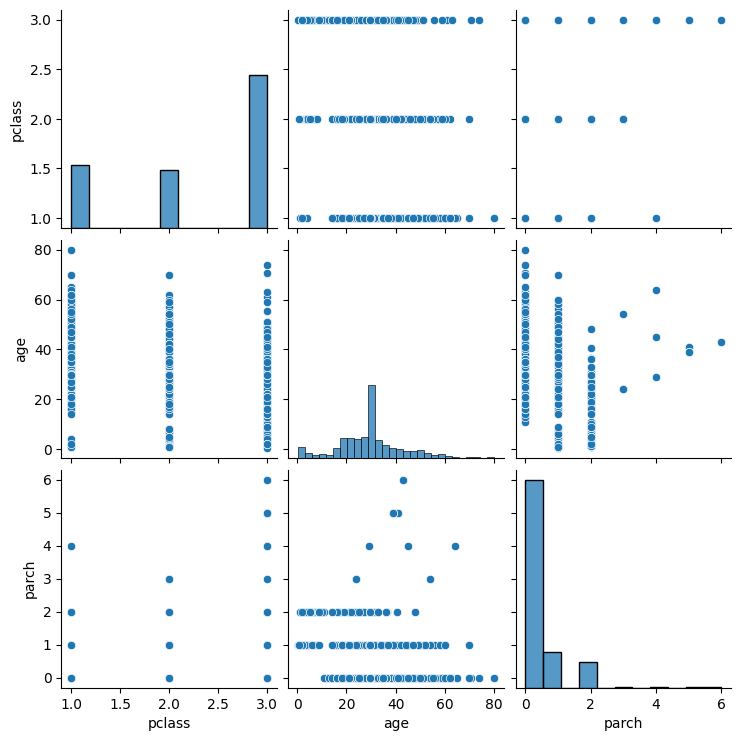

In [64]:
sns.pairplot(x_train)

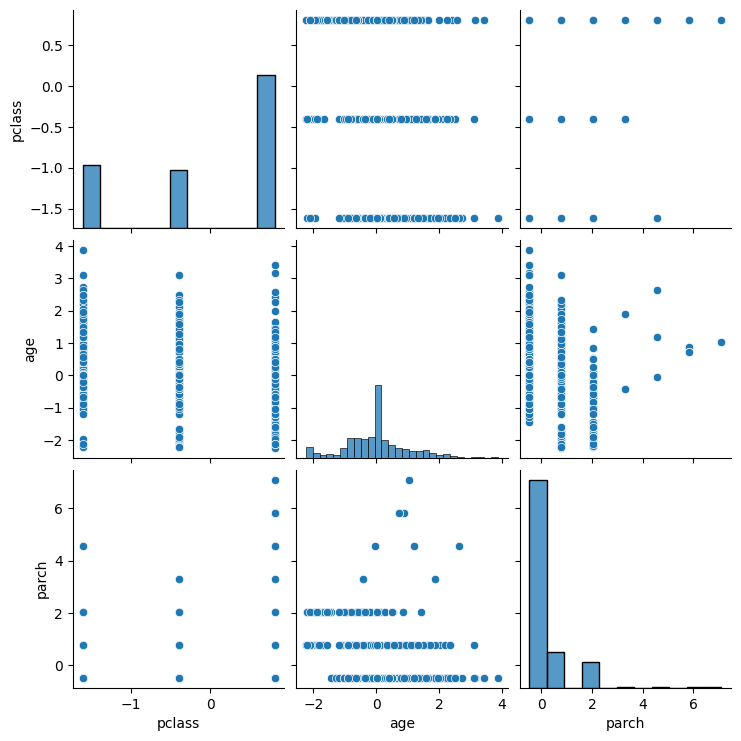

In [66]:
sns.pairplot(x_train_sc)

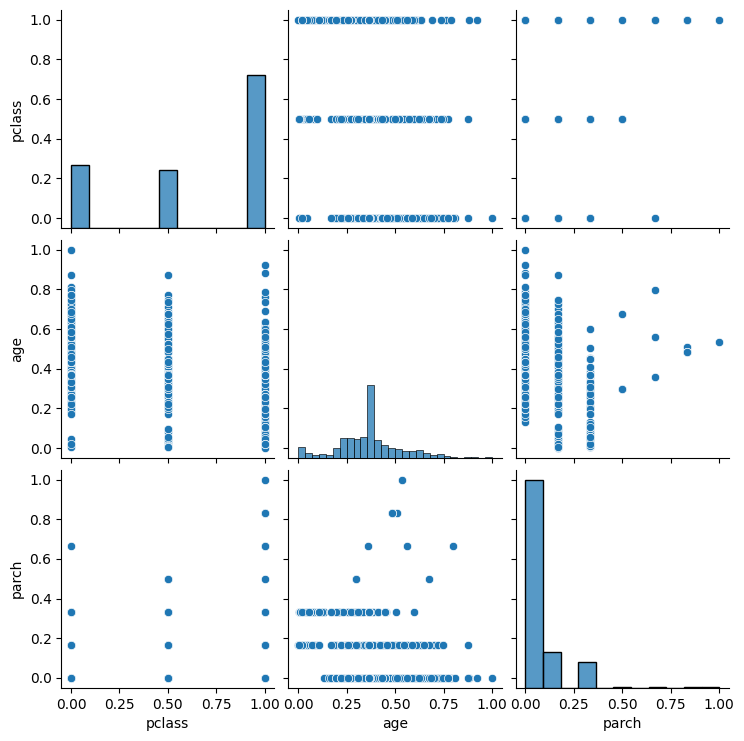

In [65]:
sns.pairplot(x_train_mmc)

### Feature Encoding:

-Feature Encoding is the process of converting categorical (text) data into numerical form,
because machine learning models understand only numbers, not text.  

-Text → Numbers

- Why is Feature Encoding Needed?

ML algorithms:

perform mathematical calculations  
work with numerical values  

So features like City, Gender, Color must be converted into numbers.

- Types of Feature Encoding Techniques

There are two main techniques:

1.Label Encoding
2.One-Hot Encoding

#### Categorical Variable Encoding:

- 2 types:

1.Ordinal Variable
2.Nominal Variable

1.Ordinal Variable:-

-Ordinal Variable are categorical variable in which the categories can be meaningfully ordered.    
-When the ordinal variable convert into the number then it has mathematical value.  
-Ex- Rating of product

2.Nominal Encoding:-

-Nominal Encoding is same like ordinal variable but there is nothing that indicates an intrinsic order of the labels and in principle.  
-All labels are equal no order.  
-no mathematical value  
-Ex- Colours:Red, Green, White, Black.  


1. Label Encoding:

-Label Encoding apply on ordinal and Nominal categorial variables.   
-Label Encoding converts each category into a unique number.

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [32]:
pd.set_option('display.max_rows', None)

In [24]:
df = pd.read_csv(r"C:\Users\jadha\OneDrive\Desktop\Internship\machine learning\house_data_with_nan.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,PoolArea,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,0,NaN,NaN,0,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,0,NaN,NaN,0,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,0,NaN,NaN,0,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,0,NaN,NaN,0,2006,WD,Abnormal,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,0,NaN,NaN,0,2008,WD,Normal,250000


In [22]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'PoolArea', 'Fence',
       'MiscFeature', 'MiscVal', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [ ]:
df2 = df[["LotShape","LotArea"]]

In [30]:
le = LabelEncoder()

In [31]:
le.fit_transform(df2["LotArea"])

array([0, 2, 3, 1, 4])

In [34]:
df2["LotArea_L_enc"]= le.fit_transform(df2["LotArea"])
df2

C:\Users\jadha\AppData\Local\Temp\ipykernel_13224\3299006603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["LotArea_L_enc"]= le.fit_transform(df2["LotArea"])


,MSSubClass,LotArea,LotArea_L_enc
0,60,8450,0
1,20,9600,2
2,60,11250,3
3,70,9550,1
4,60,14260,4


In [35]:
df["LotArea"].value_counts() # original values

LotArea
8450     1
9600     1
11250    1
9550     1
14260    1
Name: count, dtype: int64

In [38]:
df["LotShape"].value_counts()

LotShape
IR1    3
Reg    2
Name: count, dtype: int64

In [42]:
order_Label = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}

In [45]:
df2["LotShape"] = df["LotShape"]
df2["Lotshape_org_enc"] = df2["LotShape"].map(order_Label) # mapping the values
df2

C:\Users\jadha\AppData\Local\Temp\ipykernel_13224\2432961289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["LotShape"] = df["LotShape"]
C:\Users\jadha\AppData\Local\Temp\ipykernel_13224\2432961289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Lotshape_org_enc"] = df2["LotShape"].map(order_Label) # mapping the values


,MSSubClass,LotArea,LotArea_L_enc,LotShape,Lotshape_org_enc
0,60,8450,0,Reg,4
1,20,9600,2,Reg,4
2,60,11250,3,IR1,3
3,70,9550,1,IR1,3
4,60,14260,4,IR1,3


.

2. One - Hot Encoding :

-One-Hot Encoding creates separate binary columns (0 or 1) for each category.

🧮 Example

Original Feature: Color

Color|	Red|	Blue| Green  |
-----|-----|--------|--------|
Red	 |	1  | 	0   |0       |
Blue |	0  |	1	|0       |
Green|	0  |	0	|1       |

In [ ]:
import pandas as pd

In [58]:
tips_df = pd.read_csv(r"C:\Users\jadha\OneDrive\Desktop\Internship\machine learning\Restorent_Dataset.csv")
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [72]:
dummy_df = pd.get_dummies(tips_df)
dummy_df =dummy_df.astype(int)
dummy_df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,day_Sun,time_Dinner
0,16,1,2,1,0,1,1,1
1,10,1,3,0,1,1,1,1
2,21,3,3,0,1,1,1,1
3,23,3,2,0,1,1,1,1
4,24,3,4,1,0,1,1,1
5,25,4,4,0,1,1,1,1
6,8,2,2,0,1,1,1,1
7,26,3,4,0,1,1,1,1
8,15,1,2,0,1,1,1,1
9,14,3,2,0,1,1,1,1


pd.get_dummies (   //It converts categorical data (text) into numeric columns (0/1).  This is called One-Hot Encoding.
    data,
    prefix=None,   //Adds a prefix before column names.  Ex. pd.get_dummies(data, prefix='City')
    prefix_sep='_',  //Separator between prefix and category name.  
    dummy_na=False,  //Creates a column for NaN (missing values).
    columns=None,   //Specify which columns to convert.
    sparse_output=False,   //If True, returns sparse matrix (memory efficient).
    drop_first=False,   //Drops first category to avoid dummy variable trap. 
    dtype=None,   //Set data type of output columns.
)

In [78]:
pd.get_dummies(tips_df,drop_first=True, dtype=int) # drop_first to avoid dummy variable trap

,total_bill,tip,size,sex_Male
0,16.99,1.01,2,0
1,10.34,1.66,3,1
2,21.01,3.50,3,1
3,23.68,3.31,2,1
4,24.59,3.61,4,0
5,25.29,4.71,4,1
6,8.77,2.00,2,1
7,26.88,3.12,4,1
8,15.04,1.96,2,1
9,14.78,3.23,2,1


#### one- hot encoding with scikit- learn:

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
oh_enc = OneHotEncoder(sparse_output=False) # initialize the encoder

In [ ]:
oh_enc_arr=oh_enc.fit_transform(tips_df[["sex","smoker","day","time"]])
oh_enc_arr 

array([[1., 0., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.]])

In [92]:
oh_enc_df = pd.DataFrame(
    oh_enc_arr,
    columns=oh_enc.get_feature_names_out()
)
oh_enc_df

,sex_Female,sex_Male,smoker_No,day_Sun,time_Dinner
0,1.0,0.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,1.0
5,0.0,1.0,1.0,1.0,1.0
6,0.0,1.0,1.0,1.0,1.0
7,0.0,1.0,1.0,1.0,1.0
8,0.0,1.0,1.0,1.0,1.0
9,0.0,1.0,1.0,1.0,1.0
